[EGU22 SC5.15 Short course](https://meetingorganizer.copernicus.org/EGU22/session/43185)
# Deriving soil moisture information with optical remote sensing data in R
Convener: Iuliia Burdun (iuliia.burdun@aalto.fi)<br>
Co-conveners: Michel Bechtold, Viacheslav Komisarenko <br>

## Introduction
Soil moisture is a key variable needed for application in climatology and hydrology. Knowledge about soil moisture and water table depth (WTD) is essential to understanding ecosystems' global climate change feedback. Remote sensing can assist with deriving spatial soil moisture data on a regular basis. Particularly, optical remote sensing can be used to estimate soil moisture with unprecedented satellite archives (>30 years of Landsat and 6 years of Sentinel-2) at high spatial resolution (30 m and 10 m) globally.
The Optical Trapezoid Model (OPTRAM) has shown high accuracy in soil moisture estimation over mineral and organic soils. OPTRAM is a physically-based approach for remote soil moisture estimation. OPTRAM is based on the response of short-wave infrared (SWIR) reflectance to vegetation water status, which in turn responds to changes in root-zone soil moisture. OPTRAM assumes that the pixels' distribution within the STR–normalized difference vegetation index (NDVI) space is associated with their moisture availability. Pixels with the highest STR values along the NDVI gradient represent the so-called 'wet edge', and they are assumed to have the wettest conditions. Conversely, the pixels with the lowest STR values along the NDVI gradient represent the 'dry edge' and have the lowest moisture availability. In OPTRAM, wet and dry edges are isopleths of uniform soil moisture conditions in different vegetation covers.

<img src="F1.png" alt="Drawing" style="width: 500px;"/>

The concept of OPTRAM is to retrieve a soil moisture index at point *i* as a function of NDVI and STR. The wet edge is shown with a blue line and indicated by points *STRs<sub>max</sub>* and *STRc<sub>max</sub>*. The dry edge is shown with the red line and indicated by points *STRs<sub>min</sub>* and *STRc<sub>min</sub>*. The color gradient indicates the transition of moisture condition from the wet to dry edges. Point *i* with *STR<sub>i</sub>* and *NDVI<sub>i</sub>* represents moderate moisture availability. For *i*, the STR values of the wet and dry edges are *STRmax<sub>i</sub>* and *STRmin<sub>i</sub>* correspondingly.<br>



The soil moisture content at a given pixel *i* is estimated as follows:



${W}_{OPTRAM, i} = \frac{{STR}_{i} - {STR}_{min, i}}{{STR}_{max, i}-{STR}_{min, i}}\  $,


where *OPTRAM<sub>i</sub>* is the soil moisture content of the pixel normalized by the local maximum wet soil content, STR<sub>i</sub> is the STR value of *i* pixel, *STRmax<sub>i</sub>* and *STRmin<sub>i</sub>* are the STR values of the dry and wet edges at the NDVI of pixel *i*. *OPTRAM<sub>i</sub>* values vary between 1 for pixels lying on the wet edge, and 0 for pixels lying on the dry edge. The NDVI and STR values of pixels are derived as:

$NDVI = \frac{{ρ}_{NIR} - {ρ}_{Red}}{{ρ}_{NIR}+{ρ}_{Red}}\  $,

$STR = \frac{(1-{ρ}_{SWIR})^2}{2{ρ}_{SWIR}}\  $,

where *ρ<sub>NIR<sub>*, *ρ<sub>Red<sub>*, and *ρ<sub>SWIR<sub>* are surface reflectance in the near-infrared (NIR), red, and SWIR wavebands, respectively.<br>
 
In peatlands, the soil moisture is tightly coupled to WTD. Therefore, OPTRAM  is a useful tool to monitor WTD dynamics in peatlands, although the sensitivity of OPTRAM  to WTD changes depends on vegetation cover and related rooting depth. Thus, we suggested an approach that identifies the peatland locations ([‘best pixels’](https://www.mdpi.com/2072-4292/12/18/2936/htm)) where the temporal variation of the OPTRAM is most representative of WTD dynamics. Identifying one (or a few) ‘best’ pixels is sufficient to monitor the temporal WTD variations over an entire intact peatland because the high saturated hydraulic conductivity of the upper peat layer sustained largely synchronised temporal WTD fluctuations over a range of a few km. Despite small-scale spatial differences in long-term mean WTD, this synchronisation of the dynamics occurred.
    
<img src="F2.png" alt="Drawing" style="width: 600px;"/>
    
## Aim and workflow 
**The aim of this short course is to show how to calculate the OPTRAM index based on Sentinel-2 data using R (free software environment)**. We will calculate OPTRAM for the vegetation period (May-August) in 2018 in Männikjarve peatland (Estonia). After that, we will look at the correlation between OPTRAM and in-situ WTD data.
    
<img src="F3.png" alt="Drawing" style="width: 1000px;"/>
    
## Data
* [Peatland boundary](https://geoportaal.maaamet.ee/eng/Spatial-Data/Estonian-Topographic-Database-p305.html)  
The boundary of the peatland area was derived from the Estonian Topographic Database.
    
* [Sentinel-2 MSI surface reflectance data](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR)
We performed cloud masking (applying [Sentinel-2: Cloud Probability dataset](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_CLOUD_PROBABILITY?hl=en)) and calculated NDVI and STR in Google Earth Engine for the vegetation period in 2018 (May-August). The code for image downloading from Google Earth Engine is available [here](https://code.earthengine.google.com/aecfafce3464b9046ef1061ca9eca18b?noload=true).
    
* [Water table depth data (WTD)](https://www.ilmateenistus.ee/siseveed/aastaraamatud-ja-bulletaan/soo-aastaraamatud/)
Water table depth (WTD) data were measured at Männikjarve peatland (Tooma mire research station) and provided by the Estonian Environment Agency.

In [1]:
# Install package
install.packages("ggspatial")

also installing the dependencies ‘jpeg’, ‘rjson’, ‘plyr’, ‘prettymapr’, ‘rosm’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Load the libraries (packages) "quietly" with suppressMessages and suppressWarnings functions
## Handle geospatial data
suppressMessages(suppressWarnings(require(raster))) # reading, writing, manipulating, analyzing of spatial data
suppressMessages(suppressWarnings(require(sf))) # work with simple features

## Plot data
suppressMessages(suppressWarnings(require(ggplot2))) # creating graphics
suppressMessages(suppressWarnings(require(ggspatial))) # framework for interacting with spatial data using ggplot2 
suppressMessages(suppressWarnings(require(cowplot))) # add-on to ggplot, provides set of themes, functions to align plots
suppressMessages(suppressWarnings(require(tmap))) # create thematic maps
suppressMessages(suppressWarnings(require(tmaptools))) # facilitates 'tmap'
suppressMessages(suppressWarnings(require(viridis))) # provide a series of color maps

# Data mutation
suppressMessages(suppressWarnings(require(stringr))) #  string manipulations
suppressMessages(suppressWarnings(require(dplyr))) # grammar of data manipulation
suppressMessages(suppressWarnings(require(stats))) #  statistical calculations and random number generation
suppressMessages(suppressWarnings(require(tidyr))) # contains tools for changing the shape and hierarchy of dataset

More information about these packages:
* [raster](https://cran.r-project.org/web/packages/raster/index.html)
* [sf](https://cran.r-project.org/web/packages/sf/index.html)
* [ggplot2](https://cran.r-project.org/web/packages/ggplot2/index.html)
* [ggspatial](https://cran.r-project.org/web/packages/ggspatial/index.html)
* [cowplot](https://cran.r-project.org/web/packages/cowplot/index.html)
* [tmap](https://cran.r-project.org/web/packages/tmap/index.html)
* [tmaptools](https://cran.r-project.org/web/packages/tmaptools/index.html)
* [viridis](https://cran.r-project.org/web/packages/viridis/index.html)
* [stringr](https://cran.r-project.org/web/packages/stringr/index.html)
* [dplyr](https://cran.r-project.org/web/packages/dplyr/index.html)
* [stats](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/stats-package.html)
* [tidyr](https://cran.r-project.org/web/packages/tidyr/index.html)

## Sentinel-2 raster NDVI and STR data exported from GEE

In Google Earth Engine, you can download the calculated NDVI and STR images as a collection of separate files. Each file - either NDVI or STR image for one date. On the example of one date (03/03/2018), we will show how to handle this type of raster data in R. 

In [3]:
# Open downloaded Sentinel-2 NDVI data
NDVI_raster <- raster("S2 image/20180303T093029_20180303T093028_T35VMF_NDVI.tif")
NDVI_raster # see the properties of NDVI RasterLayer

class      : RasterLayer 
dimensions : 174, 140, 24360  (nrow, ncol, ncell)
resolution : 10, 10  (x, y)
extent     : 456030, 457430, 6525430, 6527170  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=35 +datum=WGS84 +units=m +no_defs 
source     : 20180303T093029_20180303T093028_T35VMF_NDVI.tif 
names      : X20180303T093029_20180303T093028_T35VMF_NDVI 


In [4]:
# Look at the variable name
names(NDVI_raster)

[1] "X20180303T093029_20180303T093028_T35VMF_NDVI"

In [5]:
# The name of the variable is similar to the file name. 
# Change the long name "X20180303T093029_20180303T093028_T35VMF_NDVI" to  more understandable "NDVI"
names(NDVI_raster)<- "NDVI"
names(NDVI_raster) # better readable now?

[1] "NDVI"

In [6]:
# Repeat the same steps for STR file. 
# Open downloaded Sentinel-2 STR data
STR_raster <- raster("S2 image/20180303T093029_20180303T093028_T35VMF_STR.tif")
STR_raster

class      : RasterLayer 
dimensions : 174, 140, 24360  (nrow, ncol, ncell)
resolution : 10, 10  (x, y)
extent     : 456030, 457430, 6525430, 6527170  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=35 +datum=WGS84 +units=m +no_defs 
source     : 20180303T093029_20180303T093028_T35VMF_STR.tif 
names      : X20180303T093029_20180303T093028_T35VMF_STR 


In [7]:
# Change the long name to "STR"
names(STR_raster)
names(STR_raster)<- "STR"

[1] "X20180303T093029_20180303T093028_T35VMF_STR"

In [8]:
# Check the new name
names(STR_raster)

[1] "STR"

In [9]:
# Open the shapefile with peatland boundaries
peatland_st <- st_read("shp/EE_MAN_4326.shp") # the Bounding box parameters are shown in degrees

Reading layer `EE_MAN_4326' from data source `/home/jovyan/shp/EE_MAN_4326.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 26.23749 ymin: 58.86656 xmax: 26.26162 ymax: 58.88207
Geodetic CRS:  WGS 84


In [10]:
# Check whether coordinate projections of raster data (STR and NDVI) are the same as for the vector data
st_crs(peatland_st) == st_crs(STR_raster) # FALSE means that their projections are not similar

[1] FALSE

Since the coordinate projections are not the same, we must reproject data. Otherwise, we will face difficulties while plotting these data together.

In [11]:
# Transform reference system of peatland_st 
peatland_st <- st_transform (peatland_st, st_crs(STR_raster))
st_crs(peatland_st) == st_crs(STR_raster) # TRUE

[1] TRUE

R has a number of packages and functions that you can use for plotting geospatial data. Let's try some of them:

1) base R function "plot"

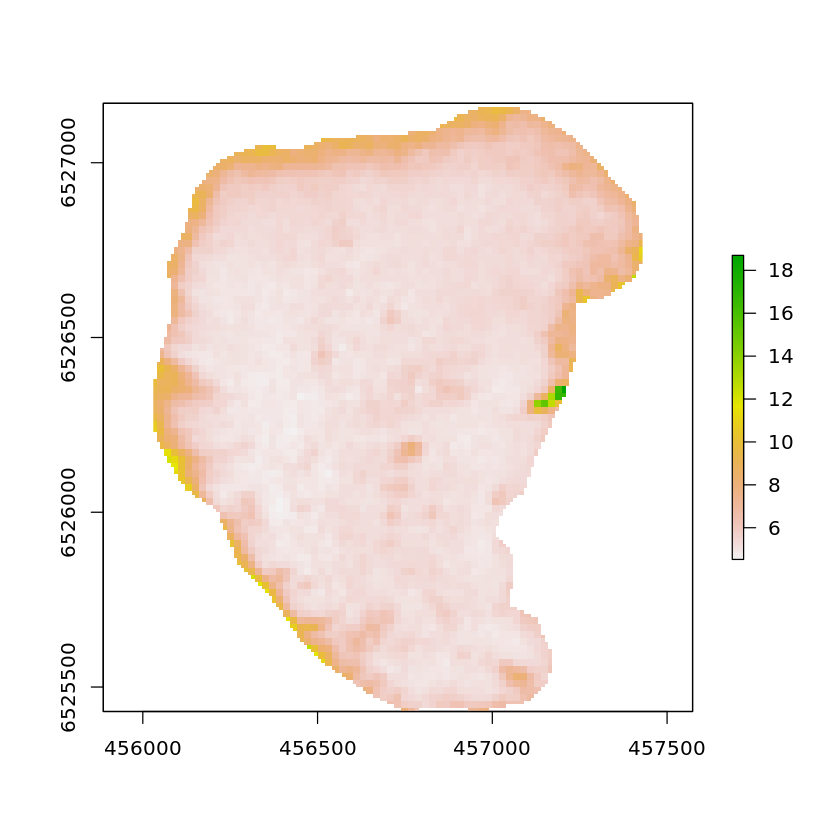

In [12]:
plot (STR_raster) # plot STR raster

Warning message in plot.sf(peatland_st, border = "black", add = TRUE, color = NaN, :
“ignoring all but the first attribute”


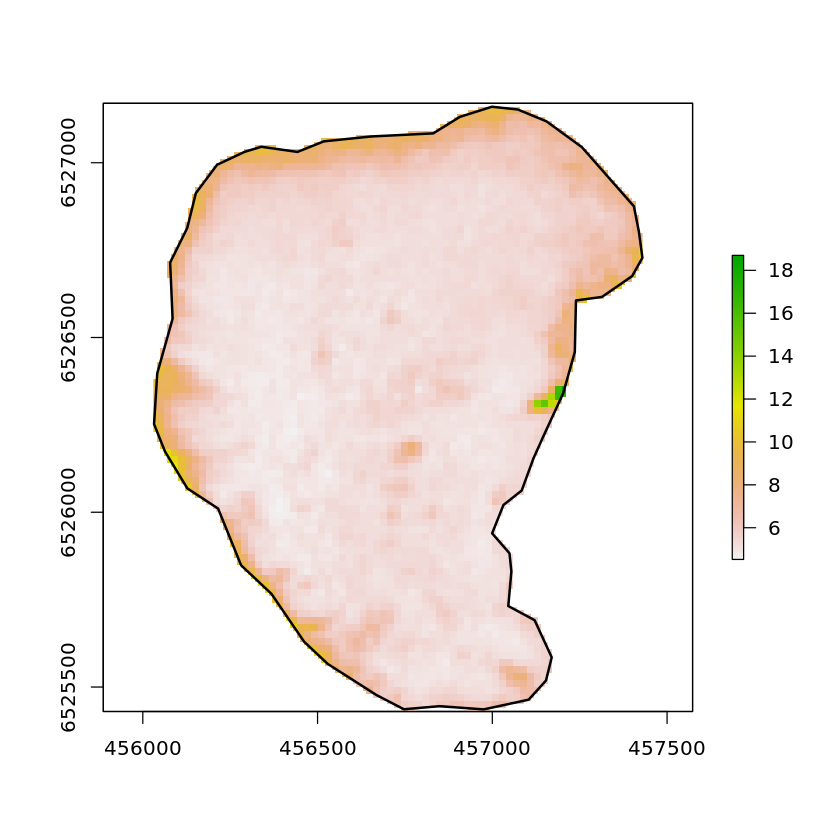

In [13]:
plot (STR_raster) # plot STR raster
plot(peatland_st, border="black", add=TRUE, color = NaN, lwd = 2)# add polygon

2) "tmap" package

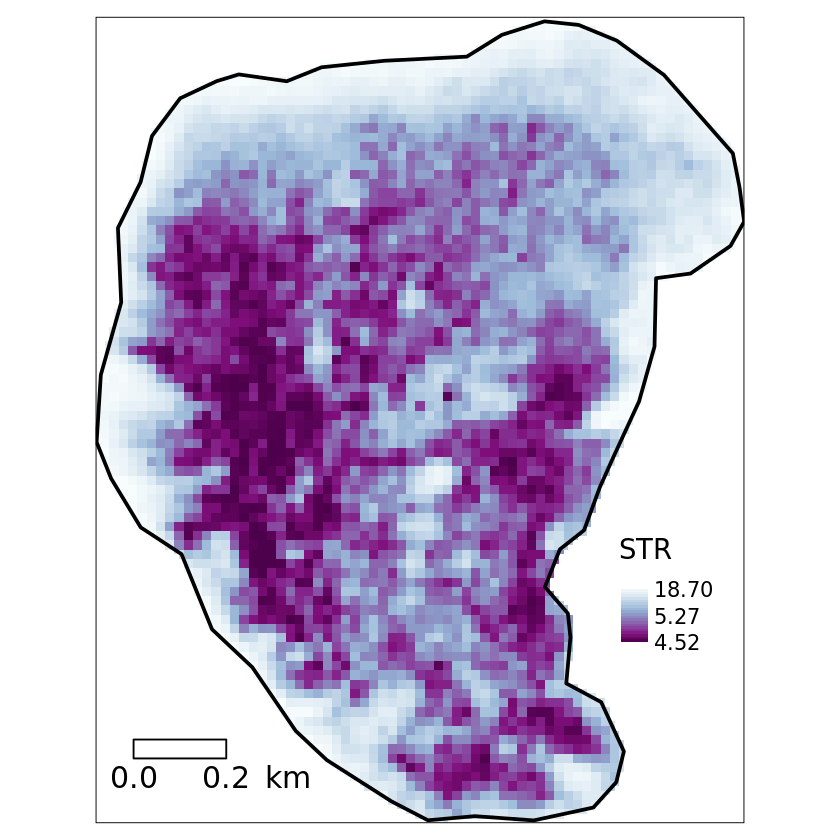

In [14]:
tm_shape(STR_raster)+
  tm_raster(style = "order", # classification method for data binning, try "cont"
            palette = "-BuPu", # try other palettes: YlGn, Reds, Greys. "-" indicates revers order
            n = 3,# number of classes
            legend.reverse = "TRUE") +
  tm_layout(legend.position = c(0.8, .2),  
            scale=1.5)+
  tm_scale_bar(position = c(0.01, .01),
               breaks = c(0, 0.2),
               text.size = 1)+
  tm_shape (peatland_st)+
  tm_borders(col = "black", lwd = 2)

[More paletts:](https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/)

<img src="F4.png" alt="Drawing" style="width: 300px;"/>


3) "ggplot2" package

In [15]:
# ggplot requires data transformation from raster file to the data frame
STR_spdf <- as(STR_raster, "SpatialPixelsDataFrame") # define spatial grid
str(STR_raster) # the initial structure of raster layer

Formal class 'RasterLayer' [package "raster"] with 12 slots
  ..@ file    :Formal class '.RasterFile' [package "raster"] with 13 slots
  .. .. ..@ name        : chr "/home/jovyan/S2 image/20180303T093029_20180303T093028_T35VMF_STR.tif"
  .. .. ..@ datanotation: chr "FLT4S"
  .. .. ..@ byteorder   : chr "little"
  .. .. ..@ nodatavalue : num -Inf
  .. .. ..@ NAchanged   : logi FALSE
  .. .. ..@ nbands      : int 1
  .. .. ..@ bandorder   : chr "BIL"
  .. .. ..@ offset      : int 0
  .. .. ..@ toptobottom : logi TRUE
  .. .. ..@ blockrows   : int 256
  .. .. ..@ blockcols   : int 256
  .. .. ..@ driver      : chr "gdal"
  .. .. ..@ open        : logi FALSE
  ..@ data    :Formal class '.SingleLayerData' [package "raster"] with 13 slots
  .. .. ..@ values    : logi(0) 
  .. .. ..@ offset    : num 0
  .. .. ..@ gain      : num 1
  .. .. ..@ inmemory  : logi FALSE
  .. .. ..@ fromdisk  : logi TRUE
  .. .. ..@ isfactor  : logi FALSE
  .. .. ..@ attributes: list()
  .. .. ..@ haveminmax: logi 

In [16]:
# Convert to data.frame
STR_df <- as.data.frame(STR_spdf)
str(STR_df) # the structure of data frame

'data.frame':	16511 obs. of  3 variables:
 $ STR: num  9.07 9.07 9.27 9.27 9.75 ...
 $ x  : num  456965 456975 456985 456995 457005 ...
 $ y  : num  6527155 6527155 6527155 6527155 6527155 ...


In [17]:
# Check the top 5 rows in the new data frame
head(STR_df, 5)

,STR,x,y
,<dbl>,<dbl>,<dbl>
1,9.065061,456965,6527155
2,9.065061,456975,6527155
3,9.270302,456985,6527155
4,9.270302,456995,6527155
5,9.752913,457005,6527155


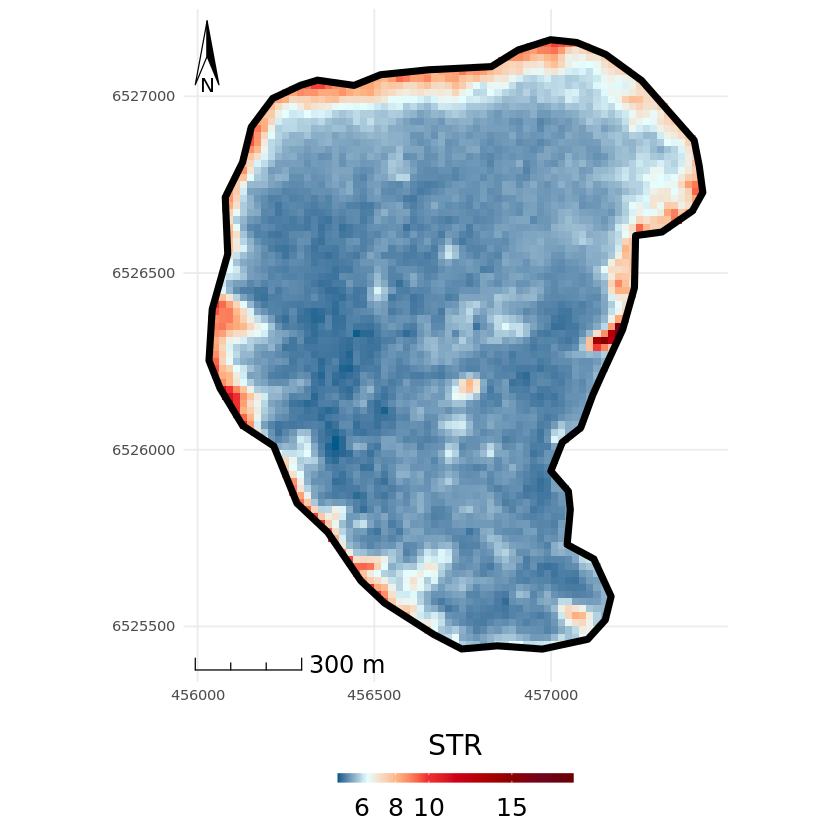

In [18]:
# Plot transformed STR_df data
fig_STR <- ggplot()+
  # plot raster file and peatland boundary
  geom_raster(data=STR_df, aes(x=x, y=y, fill=STR))+
  geom_sf(data = peatland_st, 
          fill = NA, # no inner fill
          colour = "black", # boundary colour
          size=2)+
  # set the colour palette for raster file
    scale_fill_gradientn(colours  = c("#005b8a", "#e5feff", "#fdb586", 
                                      "#f23333", "#cf001b", "#ac0002", 
                                      "#8b0000", "#6e031e",  "#6b0000"),
                       # brakes in the gradient legend
                       breaks = c(4,6,8, 10, 15), 
                       # set the legend location and other parameters
                       guide = guide_colorbar(direction = "horizontal",
                                              barheight = unit(2, units = "mm"),
                                              barwidth = unit(50, units = "mm"),
                                              # set the title above the legend
                                              # and in the middle
                                              title.position = 'top',
                                              title.hjust = 0.5,
                                              label.hjust = 0.5))+
  #set theme parameters
  theme_minimal()+
  theme(axis.title = element_blank(),
        legend.position = "bottom",
        legend.key.width = unit(1,"cm"),
        legend.key.height = unit(0.5,"cm"),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 17))+
  # add scale and north arrow if needed
  annotation_scale(location = "bl", 
                   style = "ticks",
                   text_cex = 1.2) +
  annotation_north_arrow(width = unit(0.5, "cm"), 
                         location = "tl")+
  # set the coordinate referances of the map 
  coord_sf(datum=st_crs(32635))+ 
  # set the breaks of the map net
  scale_x_continuous(breaks = seq(round(min(STR_df$x), digits = -3),
                                  round(max(STR_df$x), digits = -3),
                                  500))+
  scale_y_continuous(breaks = seq(round(min(STR_df$y), digits = -3),
                                  round(max(STR_df$y), digits = -3),
                                  500))
fig_STR

Now we can plot NDVI data similarly to STR data. We will use "ggplot2" package for NDVI data, but you are free to test the base "plot" function and "tmap" package.

In [19]:
# Transform and plot NDVI data
NDVI_spdf <- as(NDVI_raster, "SpatialPixelsDataFrame")
NDVI_df <- as.data.frame(NDVI_spdf)
str(NDVI_df)

'data.frame':	16511 obs. of  3 variables:
 $ NDVI: num  0.467 0.384 0.42 0.405 0.443 ...
 $ x   : num  456965 456975 456985 456995 457005 ...
 $ y   : num  6527155 6527155 6527155 6527155 6527155 ...


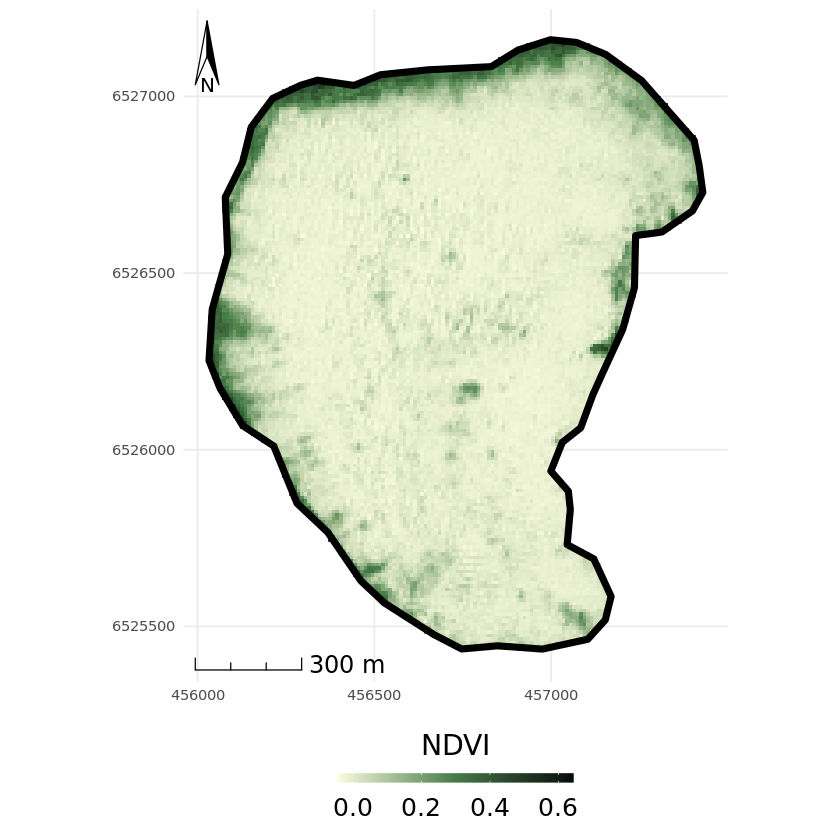

In [20]:
# Plot NDVI raster file
fig_NDVI <- ggplot()+  
  # plot raster file and peatland boundary
  geom_raster(data=NDVI_df, aes(x=x, y=y, fill=NDVI))+
  geom_sf(data = peatland_st, 
          fill = NA, 
          colour = "black", 
          size=2)+
  # set the colour palette for raster file
  scale_fill_gradientn(colours  = c("#FCFDE1", "#467C46", "#040B0B"), 
                       guide = guide_colorbar(direction = "horizontal",
                                              barheight = unit(2, units = "mm"),
                                              barwidth = unit(50, units = "mm"),
                                              title.position = 'top',
                                              title.hjust = 0.5,
                                              label.hjust = 0.5))+
  #set theme parameters
  theme_minimal()+
  theme(axis.title = element_blank(),
        legend.position="bottom",
        legend.key.width=unit(1,"cm"),
        legend.key.height = unit(0.5,"cm"),
        legend.text=element_text(size=15),
        legend.title = element_text(size=17))+
  # add scale and north arrow if needed
  annotation_scale(location = "bl", 
                   style = "ticks",
                   text_cex = 1.2)  +
  annotation_north_arrow(width = unit(0.5, "cm"), 
                         location = "tl")+
  # set the coordinate referances of the map 
  coord_sf(datum=st_crs(32635))+ 
  # set the breaks of the map net
  scale_x_continuous(breaks = seq(round(min(NDVI_df$x), digits = -3),
                                  round(max(NDVI_df$x), digits = -3),
                                  500))+
  scale_y_continuous(breaks = seq(round(min(NDVI_df$y), digits = -3),
                                  round(max(NDVI_df$y), digits = -3),
                                  500))
fig_NDVI

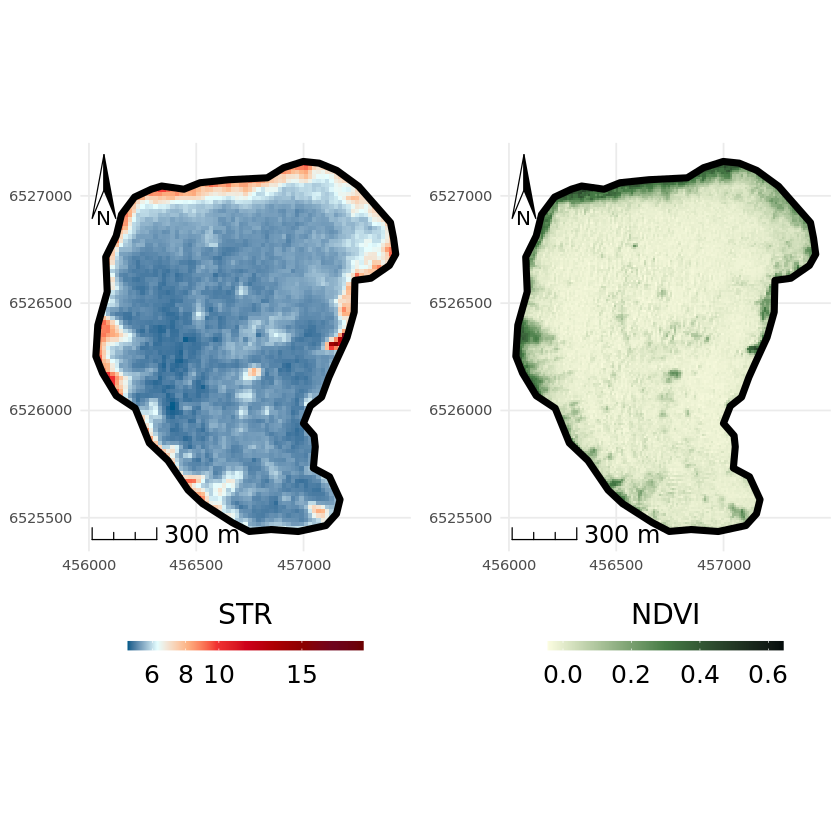

In [21]:
# Plot both STR and NDVI rasters
plot_grid(fig_STR, fig_NDVI, ncol = 2, nrow = 1)

## Sentinel-2 data converted to table

Sentinel-2 data were downloaded from Google Earth Engine as .tif raster files and later converted to table format. This is time-consuming, so we have already prepared converted data for you. Nevertheless, the code to convert Sentinel-2 data is given below (no need to run it).

In [22]:
# Code to convert STR raster data to csv. 
# The same algorithm should be applied for NDVI data

# files <- list.files(path="S2 image/", full.names=TRUE, pattern="*_STR.tif")
# lapply(files , function(x) {
#   t <- raster (x)
#   filename <- names(t)
#   d<- cbind(coordinates(t), v=values(t))
#   df<-as.data.frame(d)
#   name <-names(t)[1] # load file
#   name <-str_sub(name, 2,9)
#   date <- as.Date(name , format="%Y%m%d")
#   df$date<-date 
#   names(df)[names(df) == "v"] <- "STR"
#   write.csv(df, file=paste0("your path",filename,".csv"))
# })

In [23]:
# The converted csv files can be found in the folder "S2 data in csv"
STR_filename <- list.files("S2 data in csv/", pattern="*_STR.csv", full.names=TRUE, recursive=FALSE)
STR_filename # 15 csv files were created for 15 Sentinel-2 raster files

[1] "S2 data in csv//20180507T093041_20180507T093036_T35VMF_EE_MAN_STR.csv"
 [2] "S2 data in csv//20180510T094031_20180510T094337_T35VMF_EE_MAN_STR.csv"
 [3] "S2 data in csv//20180512T093029_20180512T093032_T35VMF_EE_MAN_STR.csv"
 [4] "S2 data in csv//20180515T094029_20180515T094029_T35VMF_EE_MAN_STR.csv"
 [5] "S2 data in csv//20180520T094031_20180520T094033_T35VMF_EE_MAN_STR.csv"
 [6] "S2 data in csv//20180525T094029_20180525T094155_T35VMF_EE_MAN_STR.csv"
 [7] "S2 data in csv//20180530T094031_20180530T094032_T35VMF_EE_MAN_STR.csv"
 [8] "S2 data in csv//20180601T093029_20180601T093030_T35VMF_EE_MAN_STR.csv"
 [9] "S2 data in csv//20180611T093029_20180611T093032_T35VMF_EE_MAN_STR.csv"
[10] "S2 data in csv//20180714T094029_20180714T094337_T35VMF_EE_MAN_STR.csv"
[11] "S2 data in csv//20180721T093029_20180721T093032_T35VMF_EE_MAN_STR.csv"
[12] "S2 data in csv//20180731T093029_20180731T093030_T35VMF_EE_MAN_STR.csv"
[13] "S2 data in csv//20180810T093029_20180810T093029_T35VMF_EE_MAN_STR.csv"
[14] "S2 data in csv//20180818T094031_20180818T094030_T35VMF_EE_MAN_STR.csv"
[15] "S2 data in csv//20180823T094029_20180823T094320_T35VMF_EE_MAN_STR.csv"

We have 15 .csv files that we need to join. To make our life easier we will use the following functions:
* Map - apply a function across multiple vectors or lists; 
* lapply - apply a function over a list or vector;
* do.call - executes a function call from a name or a function and a list of arguments to be passed to it;

Other useful functions:
* fread - similar to read.table but faster;
* subset - select variables and observations;
* rbind - combine vectors, matrices and data frames by rows.

<img src="F5.png" alt="Drawing" style="width: 500px;"/>


In [24]:
# Read 15 tables and create a list of them
STR_tables <- Map(cbind, lapply(STR_filename, data.table::fread, sep=","))
str(STR_tables)

List of 15
 $ :Classes ‘data.table’ and 'data.frame':	16511 obs. of  5 variables:
  ..$ V1  : int [1:16511] 234 235 236 237 238 239 240 241 242 243 ...
  ..$ x   : int [1:16511] 456965 456975 456985 456995 457005 457015 457025 457035 457045 457055 ...
  ..$ y   : int [1:16511] 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 ...
  ..$ STR : num [1:16511] 5.73 5.73 5.87 5.87 5.97 ...
  ..$ Date: IDate[1:16511], format: "2018-05-07" "2018-05-07" ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ :Classes ‘data.table’ and 'data.frame':	16511 obs. of  5 variables:
  ..$ V1  : int [1:16511] 234 235 236 237 238 239 240 241 242 243 ...
  ..$ x   : int [1:16511] 456965 456975 456985 456995 457005 457015 457025 457035 457045 457055 ...
  ..$ y   : int [1:16511] 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 ...
  ..$ STR : num [1:16511] 5.72 5.72 5.64 5.64 5.82 ...
  ..$ Date: IDate[1:16511], format: "2018-05-10" "2018-05-10"

In [25]:
# Apply rbind sunction to merge them into one table
STR_table <- do.call(rbind, lapply(STR_tables, subset))
head (STR_table, 5) # see the top 5 rows of the table

V1,x,y,STR,Date
<int>,<int>,<int>,<dbl>,<date>
234,456965,6527155,5.730791,2018-05-07
235,456975,6527155,5.730791,2018-05-07
236,456985,6527155,5.867201,2018-05-07
237,456995,6527155,5.867201,2018-05-07
238,457005,6527155,5.970863,2018-05-07


In [26]:
# Check for how many days we have data
unique (STR_table$Date)

[1] "2018-05-07" "2018-05-10" "2018-05-12" "2018-05-15" "2018-05-20"
 [6] "2018-05-25" "2018-05-30" "2018-06-01" "2018-06-11" "2018-07-14"
[11] "2018-07-21" "2018-07-31" "2018-08-10" "2018-08-18" "2018-08-23"

In [27]:
# Repeat the same algorithm for csv file with NDVI data
NDVI_filename <- list.files("S2 data in csv/", pattern="*_NDVI.csv", full.names=TRUE, recursive=FALSE)
NDVI_filename 

[1] "S2 data in csv//20180507T093041_20180507T093036_T35VMF_EE_MAN_NDVI.csv"
 [2] "S2 data in csv//20180510T094031_20180510T094337_T35VMF_EE_MAN_NDVI.csv"
 [3] "S2 data in csv//20180512T093029_20180512T093032_T35VMF_EE_MAN_NDVI.csv"
 [4] "S2 data in csv//20180515T094029_20180515T094029_T35VMF_EE_MAN_NDVI.csv"
 [5] "S2 data in csv//20180520T094031_20180520T094033_T35VMF_EE_MAN_NDVI.csv"
 [6] "S2 data in csv//20180525T094029_20180525T094155_T35VMF_EE_MAN_NDVI.csv"
 [7] "S2 data in csv//20180530T094031_20180530T094032_T35VMF_EE_MAN_NDVI.csv"
 [8] "S2 data in csv//20180601T093029_20180601T093030_T35VMF_EE_MAN_NDVI.csv"
 [9] "S2 data in csv//20180611T093029_20180611T093032_T35VMF_EE_MAN_NDVI.csv"
[10] "S2 data in csv//20180714T094029_20180714T094337_T35VMF_EE_MAN_NDVI.csv"
[11] "S2 data in csv//20180721T093029_20180721T093032_T35VMF_EE_MAN_NDVI.csv"
[12] "S2 data in csv//20180731T093029_20180731T093030_T35VMF_EE_MAN_NDVI.csv"
[13] "S2 data in csv//20180810T093029_20180810T093029_T35VMF_EE_MAN_NDVI.csv"
[14] "S2 data in csv//20180818T094031_20180818T094030_T35VMF_EE_MAN_NDVI.csv"
[15] "S2 data in csv//20180823T094029_20180823T094320_T35VMF_EE_MAN_NDVI.csv"

In [28]:
NDVI_tables <- Map(cbind, lapply(NDVI_filename, data.table::fread, sep=","))
NDVI_table <- do.call(rbind, lapply(NDVI_tables, subset))
head (NDVI_table, 5) # see the top 5 rows of the table

V1,x,y,NDVI,Date
<int>,<int>,<int>,<dbl>,<date>
234,456965,6527155,0.6719243,2018-05-07
235,456975,6527155,0.6697328,2018-05-07
236,456985,6527155,0.6629834,2018-05-07
237,456995,6527155,0.6778263,2018-05-07
238,457005,6527155,0.6771037,2018-05-07


Now we have two tables: STR_table and NDVI_table. In both of these tables, one pixel has unique coordinates (x and v). The pixel has STR value (stored in STR_table) and NDVI values (stored in NDVI_table) for each date. So our next step is to join STR_table and NDVI_table into one table using the function full_join.

<img src="F6.png" alt="Drawing" style="width: 500px;"/>


In [29]:
# Join the tables STR_table and NDVI_table by x, y, and Date, since every pixel (with unique x- and y-coordinates) 
# for each Date has both STR and NDVI values. 
S2_table <- full_join(STR_table, NDVI_table, by=c("x", "y", "Date"))

# Check the difference
str(STR_table) 
str(NDVI_table) 
str(S2_table) # Are the dates in the Date column are recognised as dates?

Classes ‘data.table’ and 'data.frame':	221307 obs. of  5 variables:
 $ V1  : int  234 235 236 237 238 239 240 241 242 243 ...
 $ x   : int  456965 456975 456985 456995 457005 457015 457025 457035 457045 457055 ...
 $ y   : int  6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 ...
 $ STR : num  5.73 5.73 5.87 5.87 5.97 ...
 $ Date: IDate, format: "2018-05-07" "2018-05-07" ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	221307 obs. of  5 variables:
 $ V1  : int  234 235 236 237 238 239 240 241 242 243 ...
 $ x   : int  456965 456975 456985 456995 457005 457015 457025 457035 457045 457055 ...
 $ y   : int  6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 6527155 ...
 $ NDVI: num  0.672 0.67 0.663 0.678 0.677 ...
 $ Date: IDate, format: "2018-05-07" "2018-05-07" ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	221307 obs. of  7 variables:
 $ V1.x: int  23

In [30]:
# We can remove some columns that we don't need ("V1.x" and "V1.y")
S2_table <- S2_table %>% dplyr:: select(-"V1.x", -"V1.y")

# Convert Date column to the date format
S2_table$Date <- as.Date(S2_table$Date, format = "%Y-%m-%d")

# Now we have the table we can further use for OPTRAM calculation. 
# Every pixel has NDVI and STR values for each date in this table.
summary(S2_table)

       x                y                STR               Date           
 Min.   :456035   Min.   :6525435   Min.   : 0.8356   Min.   :2018-05-07  
 1st Qu.:456455   1st Qu.:6526015   1st Qu.: 2.6339   1st Qu.:2018-05-15  
 Median :456725   Median :6526395   Median : 3.7965   Median :2018-05-30  
 Mean   :456713   Mean   :6526359   Mean   : 3.8330   Mean   :2018-06-15  
 3rd Qu.:456975   3rd Qu.:6526735   3rd Qu.: 4.7194   3rd Qu.:2018-07-21  
 Max.   :457425   Max.   :6527155   Max.   :15.3552   Max.   :2018-08-23  
      NDVI        
 Min.   :0.08144  
 1st Qu.:0.51987  
 Median :0.56579  
 Mean   :0.56259  
 3rd Qu.:0.60627  
 Max.   :0.85093  

Let's see the time series of NDVI and STR values for one pixel. For this, we need to know the x and y parameters of the pixel we want to plot. You can choose the random pixel from S2_table. Another option is to plot time series of the pixel with the maximum number of observation days.

In [31]:
# How many observations are present in S2_table for each pixel (unique x and y)?
n_table <- S2_table %>% group_by(x, y)%>% # group by unique x and y values
                        summarise(n_obs = n ())

summary(n_table)

`summarise()` has grouped output by 'x'. You can override using the `.groups`
argument.


       x                y               n_obs     
 Min.   :456035   Min.   :6525435   Min.   :11.0  
 1st Qu.:456445   1st Qu.:6526035   1st Qu.:13.0  
 Median :456715   Median :6526405   Median :14.0  
 Mean   :456703   Mean   :6526370   Mean   :13.4  
 3rd Qu.:456965   3rd Qu.:6526745   3rd Qu.:14.0  
 Max.   :457425   Max.   :6527155   Max.   :15.0  

In [32]:
# The max number of observations
max(n_table$n_obs)

[1] 15

In [33]:
# From n_table select pixels that have the maximum number of observations
n_table <- n_table %>% filter(n_obs == max(n_table$n_obs))
head(n_table, 5) # - one row - one unique pixel
nrow(n_table) # overall, 911 pixels with 15 observations

x,y,n_obs
<int>,<int>,<int>
456105,6526105,15
456105,6526115,15
456115,6526115,15
456125,6526155,15
456185,6526055,15


[1] 991

In [34]:
# Among 991 pixels we can choose  one for plotting its' time-series.
# Let's select the first one
n_max <- n_table[1,] # select the first row from n_table
n_max

x,y,n_obs
<int>,<int>,<int>
456105,6526105,15


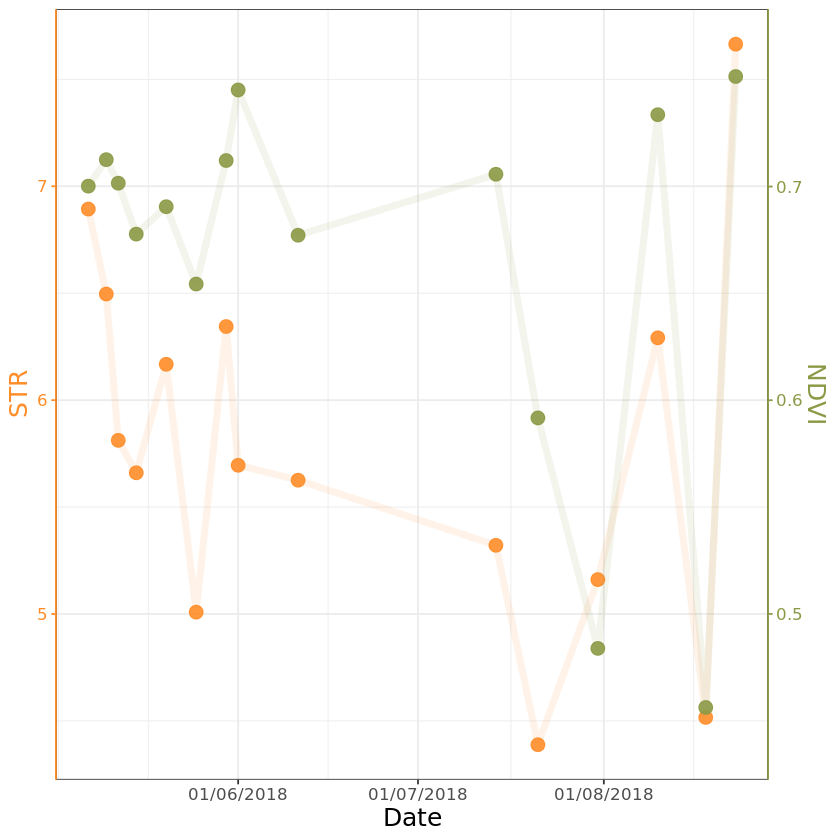

In [35]:
# Plot NDVI and STR time series of the selected pixel
fig_TS_S2 <- ggplot(subset(S2_table, x %in% n_max$x  & y %in% n_max$y ))+
  # add STR 
  geom_point(aes( x= Date, y=STR), 
             color= "#FF8D29", # show STR with orange colour
             size=3.5, 
             alpha=0.9)+ # alpha set the transparency (0 - transparent, 1 - opaque) 
  geom_line(aes( x= Date, y=STR), 
            color= "#FF8D29", 
            size=2, 
            alpha=0.1)+
  # add NDVI
  geom_point(aes( x= Date, y=NDVI*10), # scale NDVI to show it on one plot with STR
             color= "#8B9A46", # show NDVI with green colour
             size=3.5, 
             alpha=0.9)+
  geom_line(aes( x= Date, y=NDVI*10), 
            color= "#8B9A46", 
            size=2, 
            alpha=0.1)+
  # Set the axis
  scale_x_date(date_breaks = "1 month", 
               date_labels = "%d/%m/%Y")+
  scale_y_continuous(name = "STR", 
                     # show NDVI on the secondary axis
                     sec.axis = sec_axis(~./10, name= "NDVI"))+
  # theme parameters
  theme_bw()+
  theme(axis.title = element_text(size=15),
        axis.text = element_text(size=10),
        # right axis
        axis.line.y.right = element_line(color = "#8B9A46"), 
        axis.ticks.y.right = element_line(color = "#8B9A46"),
        axis.text.y.right = element_text(color = "#8B9A46"), 
        axis.title.y.right = element_text(color = "#8B9A46"),
        # left axis
        axis.line.y.left = element_line(color = "#FF8D29"), 
        axis.ticks.y.left = element_line(color = "#FF8D29"),
        axis.text.y.left = element_text(color = "#FF8D29"), 
        axis.title.y.left = element_text(color = "#FF8D29")
        )
fig_TS_S2  

## OPTRAM calculation

OPTRAM is calculated based on NDVI-STR space. Before the OPTRAM calculation, it is crucial to see what NDVI-STR space looks like for our data. 


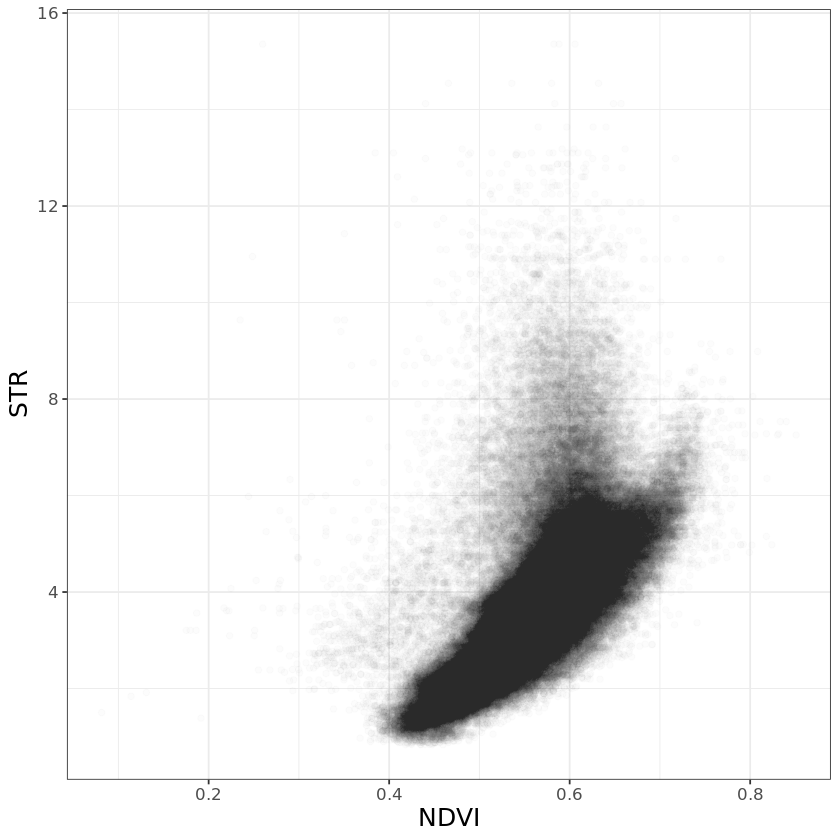

In [36]:
# Plot NDVI-STR scatterplot
fig_NDVIvsSTR <- ggplot(S2_table, aes(x=NDVI, y=STR))+
  geom_point(alpha = 1/80)+
  theme_bw()+
  theme(axis.title = element_text(size=15),
        axis.text = element_text(size=10))
fig_NDVIvsSTR

In [37]:
# Based on the observed NDVI-STR cloud, we can set the parameters 
# for wet and dry edges
ndvi_at_minimal_str <- 0.45 # min NDVI value 
ndvi_at_maximal_str <- 0.6 # max NDVI value 
sub_number <- 10 # number of subintervals in each interval
step <- 0.001 #  step for intervals

max_i <- (ndvi_at_maximal_str - ndvi_at_minimal_str) / step
max_i # number of subintervals

total_int_number <- max_i / sub_number # number of intervals
total_int_number

[1] 150

[1] 15

### Wet edge
We have divided NDVI-STR space into total_int_number of intervals and each interval into 10 subintervals. Now we will derive the max value of STR within each subinterval and store it in max_str_intervals_we table. After that, we will associate the subinterval's max STR value with the subinterval's median NDVI value. Associated max STR and median NDVI values will be written in subinterval_data_we.

<img src="F7.png" alt="Drawing" style="width: 700px;"/>


In [38]:
# Create empty list that we will use to store the data derived in loop
median_ndvi_intervals_we <- list()
max_str_intervals_we <- list()

for (i in 1:max_i) {
  # find the max and max NDVI for each subinterval
  current_low <- ndvi_at_minimal_str + step*(i-1)
  current_high <- ndvi_at_minimal_str + step*i
  
  # filter data that belong to the subinterval
  current_df <- S2_table[(S2_table$NDVI < current_high) & 
                           (S2_table$NDVI >= current_low),]
  
  # derive the max STR within the subinterval 
  max_str <- max(current_df$STR)
  max_str_intervals_we[[length(max_str_intervals_we)+1]] <- max_str
  
  # derive the median NDVI value of the subinterval
  current_median_ndvi <- median(current_df$NDVI)
  median_ndvi_intervals_we[[length(median_ndvi_intervals_we)+1]] <- current_median_ndvi
}

# max STR values within each NDVI subinterval
subinterval_data_we <- data.frame(STR=unlist(max_str_intervals_we), 
                                  NDVI=unlist(median_ndvi_intervals_we))
head(subinterval_data_we, 5)

,STR,NDVI
,<dbl>,<dbl>
1,7.815796,0.4505268
2,6.228995,0.4514877
3,11.614308,0.4525325
4,7.518414,0.4535006
5,7.082580,0.4544635


Some max STR values might be outliers with extremely high STR values. Therefore, we will filter them out before wet edge calculation following the next steps:

1. calculate median and standard deviation values of max STR within each interval;

2. filter out max STR which values are higher than the estimated median + standard deviation;

3. with the remained max STR values, calculate the median within each interval;

4. assign this final median max STR as the STR value to be used for the wet edge calculation.


<img src="F8.png" alt="Drawing" style="width: 700px;"/>

In [39]:
filtered_max_str_we <- list()
filtered_median_ndvi_we <- list()

for (i in 1:total_int_number) {
  current_data_chunk <- subinterval_data_we[round((i-1)*sub_number, 0):round(i*sub_number, 0),]
  
  # Within each interval find the max STR values that is lower than 
  # median max STR + std max STR
  str_threshold <- median(current_data_chunk$STR) + sd(current_data_chunk$STR)
  
  # Filter based on this condition
  filtered_data <- current_data_chunk[current_data_chunk$STR < str_threshold,]
  
  # Average remained max STR values for each interval and calculate 
  # median NDVI within each interval
  filtered_max_str_we[[length(filtered_max_str_we)+1]] <- median(filtered_data$STR)
  filtered_median_ndvi_we[[length(filtered_median_ndvi_we)+1]] <- median(filtered_data$NDVI)
}

In [40]:
# NDVI and STR values that are used for further dry edge estimation
print(unlist(filtered_max_str_we))

 [1]  7.518414  8.252192  8.355159  9.462363 11.054626 10.463498 11.097995
 [8] 11.097995 11.335570 11.585988 12.246413 11.473549 12.130302 12.519334
[15] 11.742297


In [41]:
# Linear model with all the max STR and NDVI values
interval_data <- data.frame(STR=unlist(filtered_max_str_we), 
                            NDVI=unlist(filtered_median_ndvi_we))
relation_wetedge <- lm(STR~NDVI, data=interval_data)
coef(relation_wetedge) # coefficients of the linear model

intercept_we <- coef(relation_wetedge)["(Intercept)"]
intercept_we

slope_we <- coef(relation_wetedge)["NDVI"]
slope_we

(Intercept)        NDVI 
  -5.862616   31.550905

(Intercept) 
  -5.862616

NDVI 
31.55091

### Dry edge
A similar algorithm is applied for dry edge estimation. For the dry edge, we need to derive the min STR value for each NDVI interval.This min STR value is arranged with the median NDVI value of each NDVI subinterval

In [42]:
median_ndvi_intervals_de <- list()
min_str_intervals_de <- list()

for (i in 1:max_i) {
  current_low <- ndvi_at_minimal_str + step*(i-1)*(ndvi_at_maximal_str - ndvi_at_minimal_str)
  current_high <- ndvi_at_minimal_str + step*i*(ndvi_at_maximal_str - ndvi_at_minimal_str)
  
  # filter data that belong to the subinterval
  current_df <- S2_table[(S2_table$NDVI < current_high) & (S2_table$NDVI >= current_low),]
  
  # derive the min STR within the subinterval 
  min_str <- min(current_df$STR)
  min_str_intervals_de[[length(min_str_intervals_de)+1]] <- min_str
  
  # derive the median NDVI value of the  subinterval
  current_median_ndvi <- median(current_df$NDVI)
  median_ndvi_intervals_de[[length(median_ndvi_intervals_de)+1]] <- current_median_ndvi
}

# min STR values within each NDVI subinterval
subinterval_data_de <- data.frame(STR=unlist(min_str_intervals_de), 
                                  NDVI=unlist(median_ndvi_intervals_de))

Similarly to the wet edge calculation, within each interval we:
1. calculate median and standard deviation values of min STR within each interval;
2. filter out max STR which values are lower than estimated median - standard deviation;
3. with the remained min STR values, calculate the median within each interval;
4. assign this final median min STR as the STR value to be used for dry edge calculation.

<img src="F9.png" alt="Drawing" style="width: 700px;"/>

In [43]:
filtered_min_str_de <- list()
filtered_median_ndvi_de <- list()

for (i in 1:total_int_number) {
  current_data_chunk <- subinterval_data_de[round((i-1)*sub_number, 0):round(i*sub_number, 0),]
  
  # Within each interval find the max STR values that is lower than median min STR + std min STR
  str_threshold <- median(current_data_chunk$STR) - sd(current_data_chunk$STR)
  
  # Filter based on this condition
  filtered_data <- current_data_chunk[current_data_chunk$STR > str_threshold,]
  
  # Average remained min STR values for each interval and calculate median NDVI within each interval
  filtered_min_str_de[[length(filtered_min_str_de)+1]] <- median(filtered_data$STR)
  filtered_median_ndvi_de[[length(filtered_median_ndvi_de)+1]] <- median(filtered_data$NDVI)
}

# NDVI and STR values that are used for further dry edge estimation
print(unlist(filtered_min_str_de))

# PARAMETERS FOR DRY EDGE
# Linear model with all the min STR and NDVI values
interval_data <- data.frame(STR=unlist(filtered_min_str_de), NDVI=unlist(filtered_median_ndvi_de))
relation_dryedge <- lm(STR~NDVI, data=interval_data)
coef(relation_dryedge)

intercept_de <- coef(relation_dryedge)["(Intercept)"]
intercept_de

slope_de <- coef(relation_dryedge)["NDVI"]
slope_de

 [1] 0.9732546 0.9938772 1.0789893 1.0628297 1.0009650 1.0009650 1.0669821
 [8] 1.0941213 1.1035160 1.0353365 1.0843723 1.1028081 1.1431861 1.0297694
[15] 1.1927594


(Intercept)        NDVI 
  -1.783702    6.175361

(Intercept) 
  -1.783702

NDVI 
6.175361

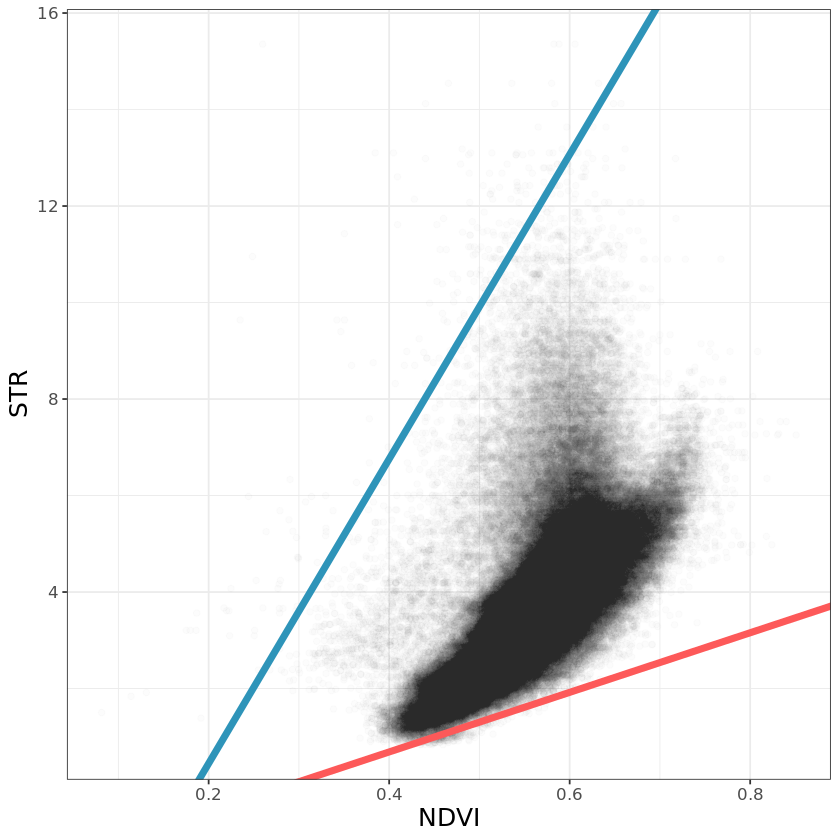

In [44]:
# Plot dry and wet edges 
fig_NDVIvsSTR_edges<- fig_NDVIvsSTR +
  # Wet edge
  geom_abline(intercept = intercept_we, 
              slope = slope_we, 
              color = "#2E94B9",
              size = 2)+
  # Dry edge
  geom_abline(intercept = intercept_de, 
              slope = slope_de, 
              color = "#FD5959",
              size = 2)
fig_NDVIvsSTR_edges

In [45]:
# OPTRAM calculation
S2_table$OPTRAM <- (S2_table$STR - (intercept_de + S2_table$NDVI * slope_de)) /
                   ((intercept_we + slope_we * S2_table$NDVI)-(intercept_de + slope_de * S2_table$NDVI ))
summary(S2_table)

       x                y                STR               Date           
 Min.   :456035   Min.   :6525435   Min.   : 0.8356   Min.   :2018-05-07  
 1st Qu.:456455   1st Qu.:6526015   1st Qu.: 2.6339   1st Qu.:2018-05-15  
 Median :456725   Median :6526395   Median : 3.7965   Median :2018-05-30  
 Mean   :456713   Mean   :6526359   Mean   : 3.8330   Mean   :2018-06-15  
 3rd Qu.:456975   3rd Qu.:6526735   3rd Qu.: 4.7194   3rd Qu.:2018-07-21  
 Max.   :457425   Max.   :6527155   Max.   :15.3552   Max.   :2018-08-23  
      NDVI             OPTRAM       
 Min.   :0.08144   Min.   :-3.8279  
 1st Qu.:0.51987   1st Qu.: 0.1242  
 Median :0.56579   Median : 0.1981  
 Mean   :0.56259   Mean   : 0.2053  
 3rd Qu.:0.60627   3rd Qu.: 0.2487  
 Max.   :0.85093   Max.   :10.6682  

In [46]:
# Pixels lying above/below wet/ dry edges have values higher than one and lower than 0. 
# We will consider those pixels as outliers and assign NaN to their OPTRAM values.
S2_table$OPTRAM [S2_table$OPTRAM >1] <- NaN   
S2_table$OPTRAM [S2_table$OPTRAM <0] <- NaN 

In [47]:
summary(S2_table) # check OPTRAM values now

       x                y                STR               Date           
 Min.   :456035   Min.   :6525435   Min.   : 0.8356   Min.   :2018-05-07  
 1st Qu.:456455   1st Qu.:6526015   1st Qu.: 2.6339   1st Qu.:2018-05-15  
 Median :456725   Median :6526395   Median : 3.7965   Median :2018-05-30  
 Mean   :456713   Mean   :6526359   Mean   : 3.8330   Mean   :2018-06-15  
 3rd Qu.:456975   3rd Qu.:6526735   3rd Qu.: 4.7194   3rd Qu.:2018-07-21  
 Max.   :457425   Max.   :6527155   Max.   :15.3552   Max.   :2018-08-23  
                                                                          
      NDVI             OPTRAM      
 Min.   :0.08144   Min.   :0.0000  
 1st Qu.:0.51987   1st Qu.:0.1244  
 Median :0.56579   Median :0.1982  
 Mean   :0.56259   Mean   :0.2044  
 3rd Qu.:0.60627   3rd Qu.:0.2486  
 Max.   :0.85093   Max.   :0.9975  
                   NA's   :514     

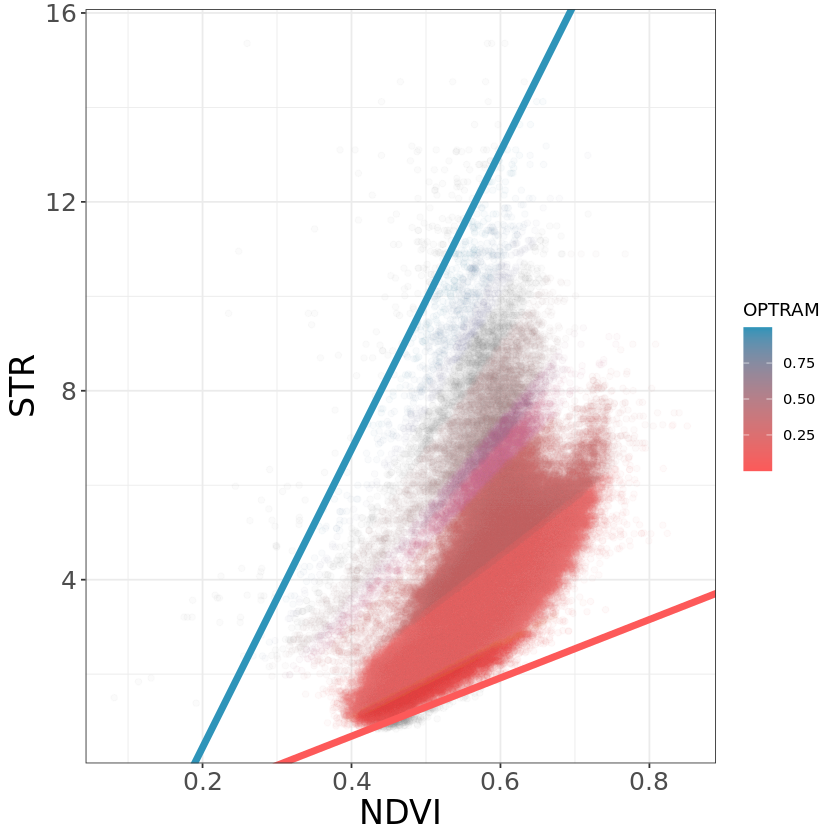

In [48]:
# Plot the NDVI-STR scatterplot with wet and dry edges, use OPTRAM values to color the points at scatterplot
ggplot(data = S2_table, aes(x = NDVI, y = STR, color = OPTRAM))+
  geom_point(alpha = 1/30)+
  # Wet edge
  geom_abline(intercept = intercept_we, 
              slope = slope_we, 
              color = "#2E94B9",
              size = 2)+
  # Dry edge
  geom_abline(intercept = intercept_de, 
              slope = slope_de, 
              color = "#FD5959",
              size = 2)+
  # Set gradient color
  scale_color_gradient(low="#FD5959",
                       high="#2E94B9")+
  # Set theme
  theme_bw()+
  theme(axis.title = element_text(size=20),
        axis.text = element_text(size=15))

## Correlation analysis between OPTRAM and water table depth data in peatland 

In [49]:
# Read WTD data
WTD_table <- read.csv ("WTD data/EE_MAN.csv")
summary(WTD_table)

     Date                WTD        
 Length:365         Min.   :-66.00  
 Class :character   1st Qu.:-47.00  
 Mode  :character   Median :-28.00  
                    Mean   :-33.92  
                    3rd Qu.:-23.00  
                    Max.   :-17.00  

In [50]:
str(WTD_table) # What is the date format?

'data.frame':	365 obs. of  2 variables:
 $ Date: chr  "01/01/2018" "02/01/2018" "03/01/2018" "04/01/2018" ...
 $ WTD : int  -18 -17 -18 -18 -18 -17 -18 -19 -20 -20 ...


In [51]:
# The Date column is recognised as character. Thus, transform it to the date format
WTD_table$Date <- as.Date(WTD_table$Date, format = "%d/%m/%Y")
str(WTD_table) # better?

'data.frame':	365 obs. of  2 variables:
 $ Date: Date, format: "2018-01-01" "2018-01-02" ...
 $ WTD : int  -18 -17 -18 -18 -18 -17 -18 -19 -20 -20 ...


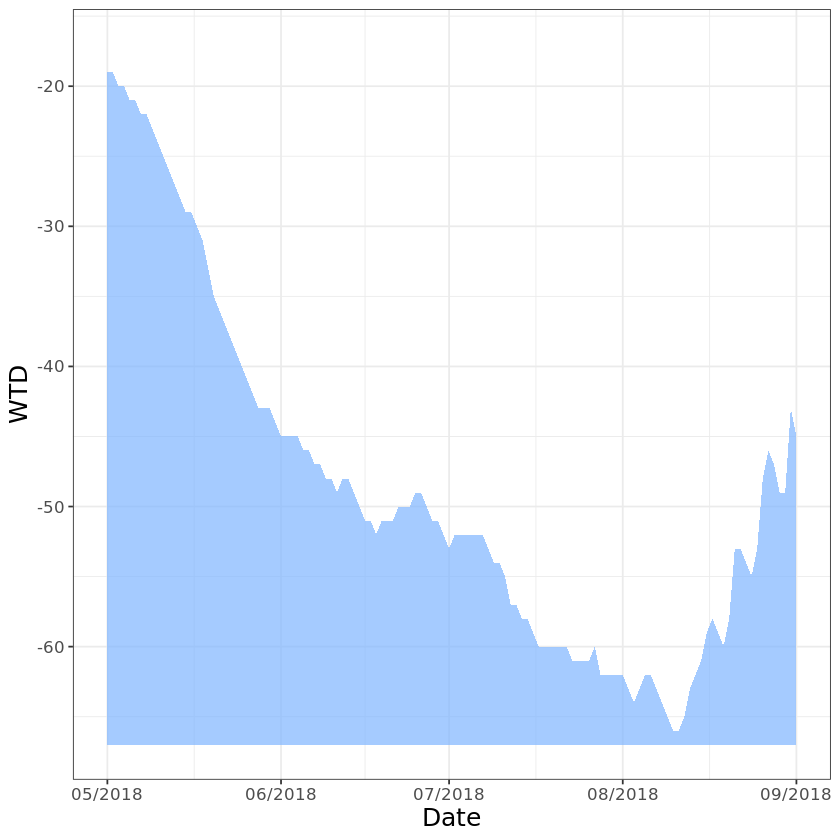

In [52]:
# Plot the time-series of NDVI and STR for one pixel
fig_TS_WTD <- ggplot(WTD_table, aes(x = Date, y = WTD))+
  geom_ribbon(aes(ymin = min(WTD,na.rm = TRUE)-1 , ymax= WTD),
              fill="#7FB5FF", alpha = 0.7)+
  theme_bw()+
  theme(axis.title = element_text(size=15),
        axis.text = element_text(size=10))+
  scale_x_date(date_breaks = "1 month", date_labels = "%m/%Y",
               limits = c(as.Date("1/05/2018", format = "%d/%m/%Y"),
                      as.Date("1/09/2018", format = "%d/%m/%Y")))
fig_TS_WTD

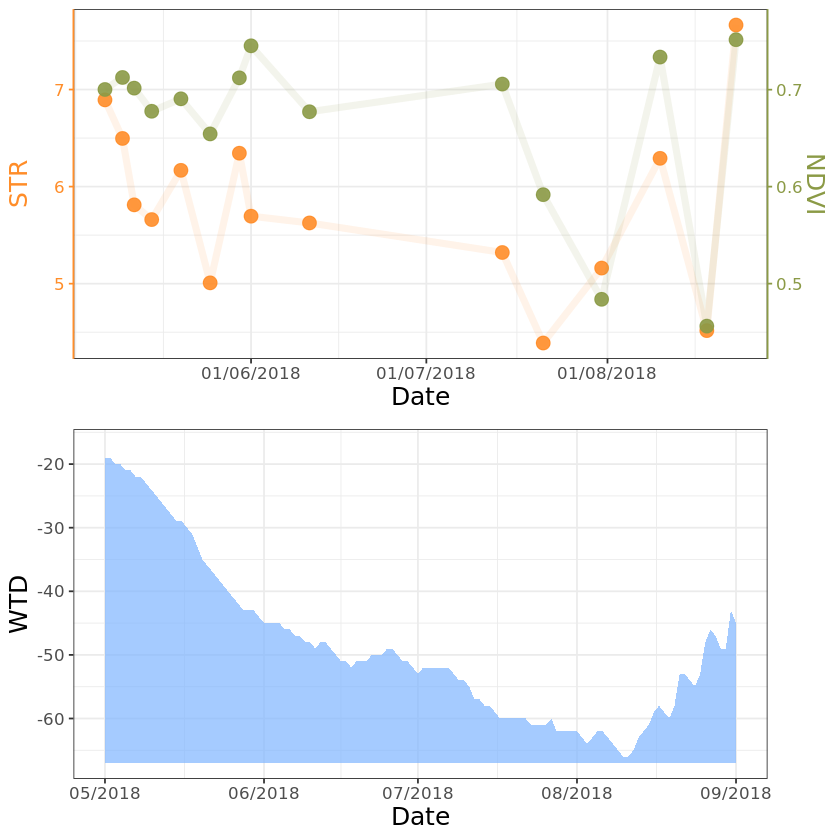

In [53]:
# Plot the time-series of NDVI and STR for one pixel together with WTD data
plot_grid(fig_TS_S2, fig_TS_WTD, ncol = 1, nrow = 2, align = "v")

In [54]:
# Join WTD_table and S2_table. Both of these tables have Date column that can be used for joining
data_table <- full_join(WTD_table, S2_table, by = "Date")
str(data_table) 

# WTD_table includes daily observations of WTD, while S2_table has sporadic data accuracy. 
# Since function full_join keeps all the data from intial tables, we have NaN values of remotely sensed parameters for 
# the date with WTD observations.

'data.frame':	221657 obs. of  7 variables:
 $ Date  : Date, format: "2018-01-01" "2018-01-02" ...
 $ WTD   : int  -18 -17 -18 -18 -18 -17 -18 -19 -20 -20 ...
 $ x     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ y     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ STR   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ NDVI  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ OPTRAM: num  NA NA NA NA NA NA NA NA NA NA ...


In [55]:
# Before we calculate correlation between OPTRAM and WTD, we need to filter out NaN values and leave only pixels with at least 4 observations
# since cor.test will result in error
data_table_n <- data_table %>%
    select(x, y, OPTRAM, WTD) %>% # select only columns you are going to use for correlation
    drop_na()%>% # omit NaN values
    group_by(x,y) %>% # group all the pixels by their unique coordinates
    mutate(n_obs = n()) %>% # mutate a new column that with the number of observations for each pixel
    ungroup()

summary(data_table_n) # what are the min and max number of observations?

       x                y               OPTRAM               WTD        
 Min.   :456035   Min.   :6525435   Min.   :0.0000197   Min.   :-66.00  
 1st Qu.:456455   1st Qu.:6526015   1st Qu.:0.1244330   1st Qu.:-58.00  
 Median :456725   Median :6526395   Median :0.1981994   Median :-43.00  
 Mean   :456713   Mean   :6526358   Mean   :0.2044369   Mean   :-42.92  
 3rd Qu.:456975   3rd Qu.:6526735   3rd Qu.:0.2486352   3rd Qu.:-29.00  
 Max.   :457425   Max.   :6527155   Max.   :0.9975359   Max.   :-22.00  
     n_obs      
 Min.   : 1.00  
 1st Qu.:13.00  
 Median :14.00  
 Mean   :13.43  
 3rd Qu.:14.00  
 Max.   :15.00  

Using plotunit = 'm'



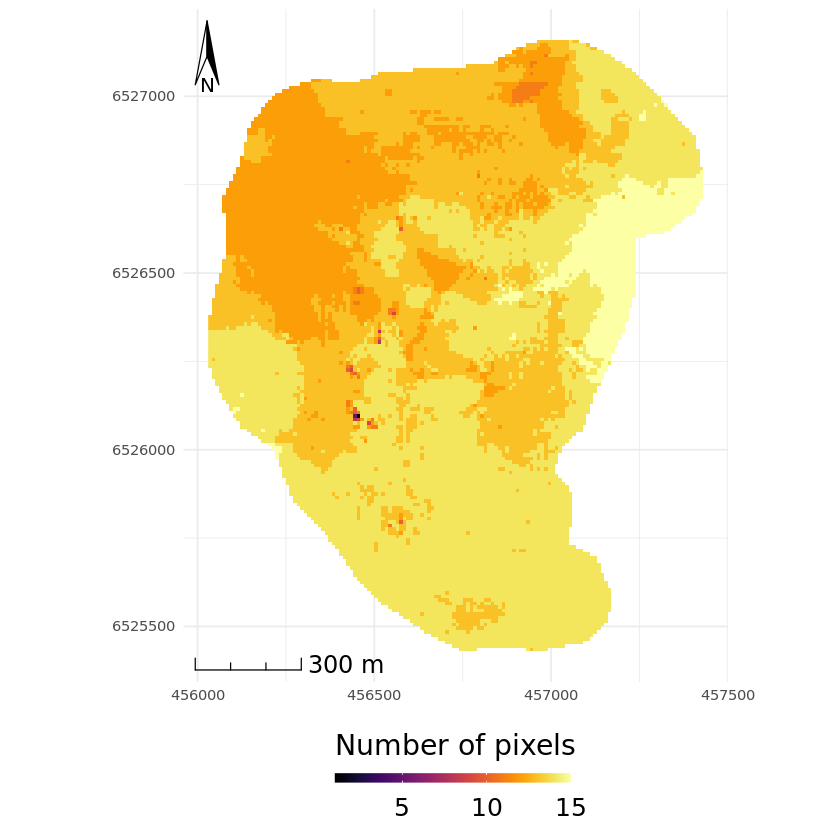

In [56]:
# Look at the spatial variability of n_obs
ggplot()+  
  geom_raster(data=data_table_n, aes(x=x, y=y, fill=n_obs))+
  scale_fill_viridis(
    option = "inferno",
    direction = 1,
    name = "Number of pixels",
    guide = guide_colorbar(
      direction = "horizontal",
      barheight = unit(2, units = "mm"),
      barwidth = unit(50, units = "mm"),
      draw.ulim = F,
      title.position = 'top',
      title.hjust = 0.5,
      label.hjust = 0.5
    ))+
  theme_minimal()+
  theme(axis.title = element_blank(),
        legend.position="bottom",
        legend.key.width=unit(1,"cm"),
        legend.key.height = unit(0.5,"cm"),
        legend.text=element_text(size=15),
        legend.title = element_text(size=17))+
  
  annotation_scale(location = "bl", 
                   style = "ticks",
                   text_cex = 1.2)  +
  annotation_north_arrow(width = unit(0.5, "cm"), location = "tl")+ 
  coord_equal()

We will use function cor.test to calculate Pearson correlation coefficient and p-value. cor.test works only when you have at least 4 observations for analysis. Thus, we should filter out pixels with <4 observations. To stay on a safe side - let's filter out pixels with <10 observations.

In [57]:
# Filter out pixels that have less than 10 observations from data_table_n
data_table_n <- data_table_n %>% filter (n_obs > 10)
summary(data_table_n)

       x                y               OPTRAM               WTD        
 Min.   :456035   Min.   :6525435   Min.   :0.0000197   Min.   :-66.00  
 1st Qu.:456455   1st Qu.:6526015   1st Qu.:0.1243815   1st Qu.:-58.00  
 Median :456725   Median :6526395   Median :0.1980844   Median :-43.00  
 Mean   :456713   Mean   :6526359   Mean   :0.2040603   Mean   :-42.92  
 3rd Qu.:456975   3rd Qu.:6526735   3rd Qu.:0.2485050   3rd Qu.:-29.00  
 Max.   :457425   Max.   :6527155   Max.   :0.9975359   Max.   :-22.00  
     n_obs      
 Min.   :11.00  
 1st Qu.:13.00  
 Median :14.00  
 Mean   :13.43  
 3rd Qu.:14.00  
 Max.   :15.00  

In [58]:
# Calculate the Pearson correlation and p-values between OPTRAM and WTD time-series for each pixel remained in data_table_n
data_table_cor<-data_table_n%>%
  group_by(x,y) %>% 
  dplyr::summarize(R_pvalue=cor.test(WTD, OPTRAM, use="pairwise.complete.obs")$p.value, # p-value
                   R=cor.test(WTD, OPTRAM, use="pairwise.complete.obs")$estimate) # correlation coefficient

summary(data_table_cor)

`summarise()` has grouped output by 'x'. You can override using the `.groups`
argument.


       x                y              R_pvalue               R          
 Min.   :456035   Min.   :6525435   Min.   :0.0000000   Min.   :-0.7761  
 1st Qu.:456445   1st Qu.:6526035   1st Qu.:0.0000045   1st Qu.: 0.7446  
 Median :456715   Median :6526415   Median :0.0000631   Median : 0.8789  
 Mean   :456703   Mean   :6526371   Mean   :0.0588491   Mean   : 0.7746  
 3rd Qu.:456965   3rd Qu.:6526745   3rd Qu.:0.0025784   3rd Qu.: 0.9284  
 Max.   :457425   Max.   :6527155   Max.   :0.9994438   Max.   : 0.9869  

Make two maps with correlation coefficients:
* first - all correlation coeficients;
* second - correlation coeficients with p-value < 0.05.

Using plotunit = 'm'

Warning message:
“Raster pixels are placed at uneven horizontal intervals and will be shifted. Consider using geom_tile() instead.”
Warning message:
“Raster pixels are placed at uneven vertical intervals and will be shifted. Consider using geom_tile() instead.”
Using plotunit = 'm'



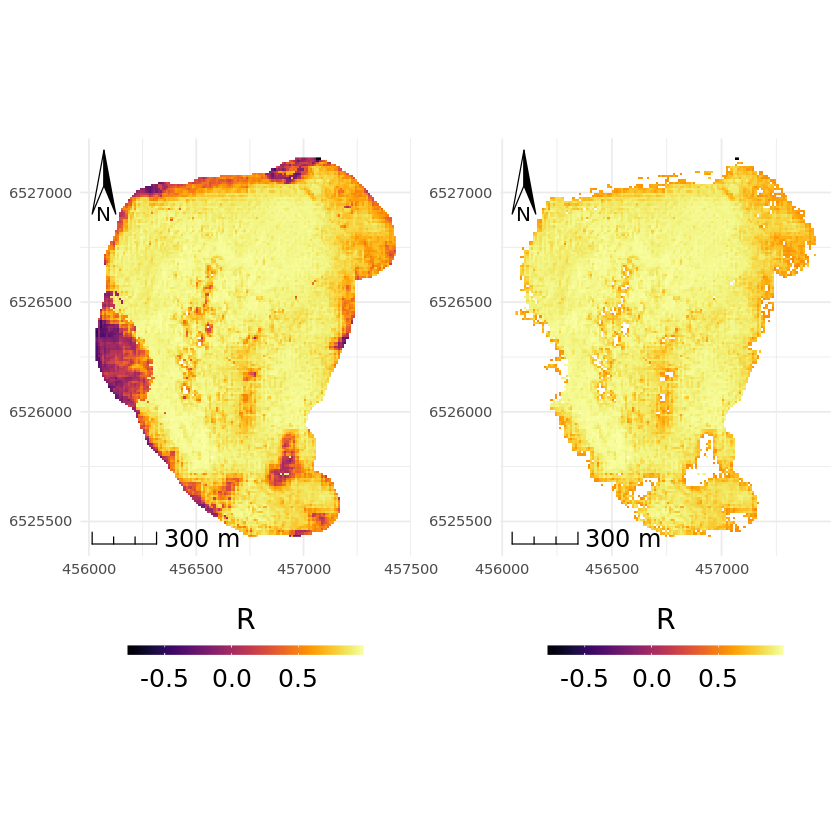

In [59]:
# Plot the per-pixel correlation coefficients
fig_Rmap<- ggplot()+  
  geom_raster(data=data_table_cor, aes(x=x, y=y, fill=R))+
  scale_fill_viridis(
    option = "inferno",
    direction = 1,
    name = "R",
    guide = guide_colorbar(
      direction = "horizontal",
      barheight = unit(2, units = "mm"),
      barwidth = unit(50, units = "mm"),
      draw.ulim = F,
      title.position = 'top',
      title.hjust = 0.5,
      label.hjust = 0.5
    ))+
  theme_minimal()+
  theme(axis.title = element_blank(),
        legend.position="bottom",
        legend.key.width=unit(1,"cm"),
        legend.key.height = unit(0.5,"cm"),
        legend.text=element_text(size=15),
        legend.title = element_text(size=17))+
  
  annotation_scale(location = "bl", 
                   style = "ticks",
                   text_cex = 1.2)  +
  annotation_north_arrow(width = unit(0.5, "cm"), location = "tl")+ 
  coord_equal()

# Plot only pixels with p-value < 0.05
fig_Rsignificantmap<-ggplot()+  
  geom_raster(data=subset(data_table_cor, R_pvalue < 0.05),
                          aes(x=x, y=y, fill=R))+
  scale_fill_viridis(
    limits = c(min(data_table_cor$R), max(data_table_cor$R)),
    option = "inferno",
    direction = 1,
    name = "R",
    guide = guide_colorbar(
      direction = "horizontal",
      barheight = unit(2, units = "mm"),
      barwidth = unit(50, units = "mm"),
      draw.ulim = F,
      title.position = 'top',
      title.hjust = 0.5,
      label.hjust = 0.5
    ))+
  theme_minimal()+
  theme(axis.title = element_blank(),
        legend.position="bottom",
        legend.key.width=unit(1,"cm"),
        legend.key.height = unit(0.5,"cm"),
        legend.text=element_text(size=15),
        legend.title = element_text(size=17))+
  
  annotation_scale(location = "bl", 
                   style = "ticks",
                   text_cex = 1.2)  +
  annotation_north_arrow(width = unit(0.5, "cm"), location = "tl")+ 
  coord_equal()

plot_grid(fig_Rmap, fig_Rsignificantmap, ncol = 2, nrow = 1, align = "h")

Based on the estimated correlation coefficints we can select the "best pixel". "Best pixel" should have the highest correlation coefficient between OPTRAM and in-situ WTD.

In [60]:
# First, select pixels with p-values lower than 0.05
data_table_bestcor <- data_table_cor %>% filter (R_pvalue < 0.05)

# Second, among the remained pixels select the one with the highest correlation value
data_table_bestcor <- data_table_bestcor[which.max(data_table_bestcor$R),]
data_table_bestcor

x,y,R_pvalue,R
<int>,<int>,<dbl>,<dbl>
456505,6525885,7.122091e-11,0.9868914


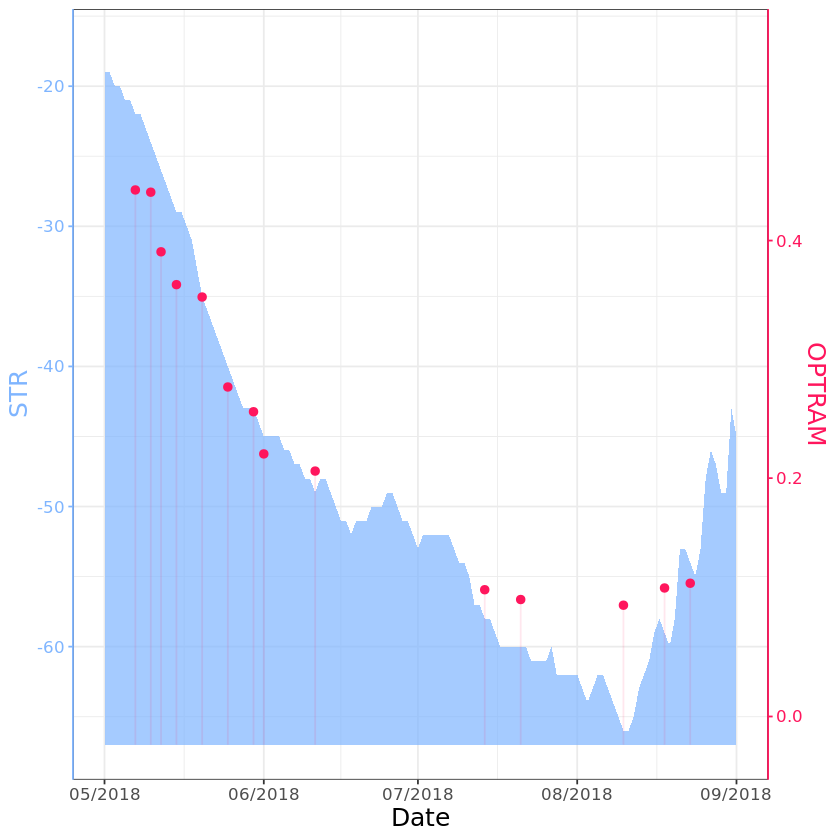

In [61]:
# Plot WTD time series with OPTRAM time series
fig_TS_WTD+
  geom_point(data = subset(data_table, x %in% data_table_bestcor$x  & y %in% data_table_bestcor$y),
             aes(x = Date, y = OPTRAM*85-65),
             color = "#FF165D",
             size = 2)+
  geom_segment(data = subset(data_table, x %in% data_table_bestcor$x  & y %in% data_table_bestcor$y),
                aes(x = Date, 
                    xend=Date, 
                    y=min(WTD,na.rm = TRUE)-1, 
                    yend=OPTRAM*85-65),
                alpha=0.1,
                color = "#FF165D")+
  scale_y_continuous(name = "STR", 
                     sec.axis = sec_axis((~./85 + 65/85), name= "OPTRAM"))+
  theme(axis.line.y.right = element_line(color = "#FF165D"), 
        axis.ticks.y.right = element_line(color = "#FF165D"),
        axis.text.y.right = element_text(color = "#FF165D"), 
        axis.title.y.right = element_text(color = "#FF165D"),
        
        axis.line.y.left = element_line(color = "#7FB5FF"), 
        axis.ticks.y.left = element_line(color = "#7FB5FF"),
        axis.text.y.left = element_text(color = "#7FB5FF"), 
        axis.title.y.left = element_text(color = "#7FB5FF")
  )

## Spatial patterns of OPTRAM

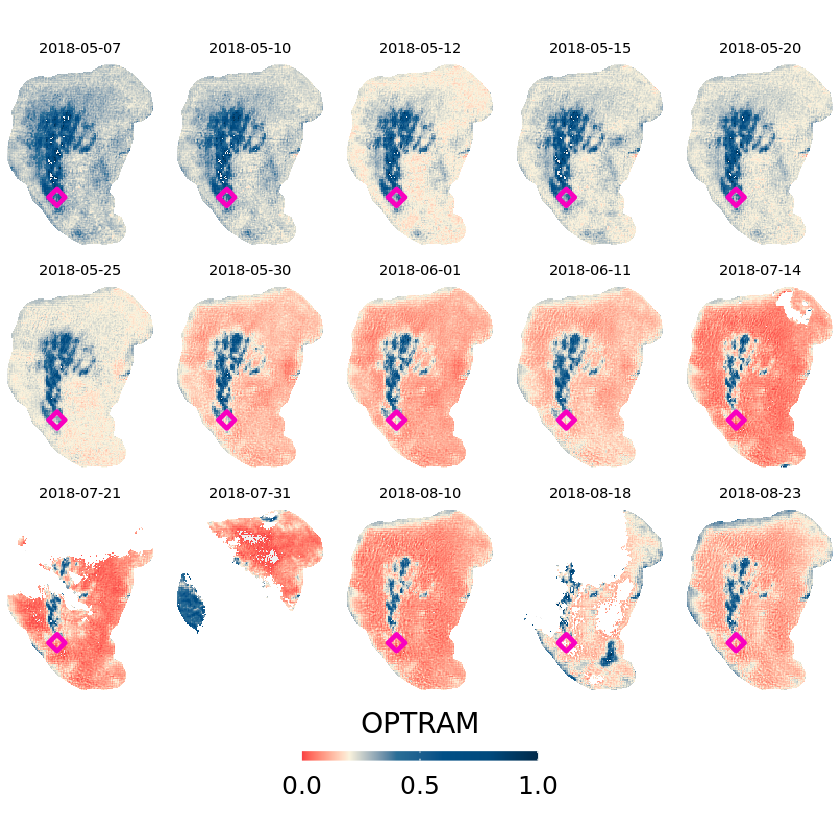

In [62]:
# Create a set of maps of OPTRAM 
fig_OPTRAM_maps<-ggplot()+
  geom_raster(data=S2_table, aes(x=x, y=y, fill=OPTRAM))+ 
  coord_equal()+
  scale_fill_gradientn(colours  = c("#f94144", "#faf3dd", "#2a6f97", "#014f86", 
                                    "#01497c",  "#012a4a"), 
                       na.value = "#F0F0F0",
                       limits = c(0,1),
                       breaks = c(0, 0.5, 1),
                       guide = guide_colorbar(direction = "horizontal",
                                              barheight = unit(2, units = "mm"),
                                              barwidth = unit(50, units = "mm"),
                                              draw.ulim = F,
                                              title.position = 'top',
                                              title.hjust = 0.5,
                                              label.hjust = 0.5))+
  theme_void()+
  theme(axis.title = element_blank(),
        legend.position="bottom",
        legend.key.width=unit(1,"cm"),
        legend.key.height = unit(0.5,"cm"),
        legend.text=element_text(size=15),
        legend.title = element_text(size=17))+
  # Add location of the "best pixel"
  geom_point(data = subset(S2_table, x %in% data_table_bestcor$x  & 
                             y %in% data_table_bestcor$y),
             aes(x = x, y = y),
             shape = 5,
             color = "#F900BF",
             size = 2,
             stroke = 2)+
  facet_wrap(Date ~ ., ncol = 5)

fig_OPTRAM_maps

In [65]:
# We have coordinates of the well where in-situ WTD data were collected.
# Open shp with well coordinates
well_st <- st_read("shp/meteostation.shp") 

Reading layer `meteostation' from data source `/home/jovyan/shp/meteostation.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 2 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 457060.6 ymin: 6526350 xmax: 457060.6 ymax: 6526350
Projected CRS: WGS 84 / UTM zone 35N


Coordinate system already present. Adding new coordinate system, which will replace the existing one.



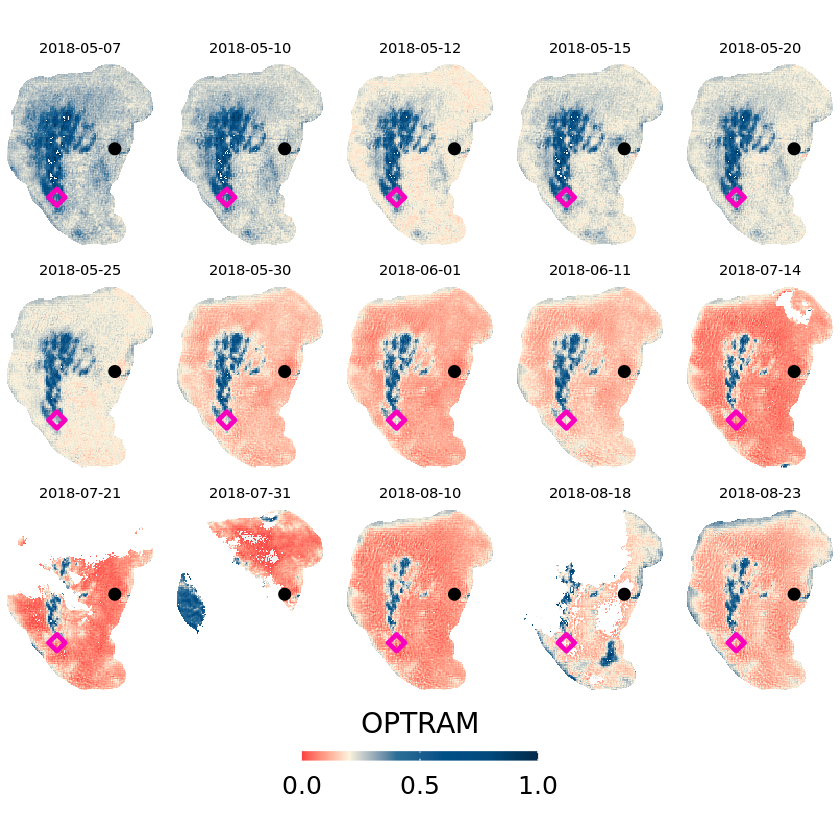

In [69]:
# Create a set of maps of OPTRAM with added well location
fig_OPTRAM_maps+
    # Add location of the well
    geom_sf(data = well_st, 
          colour = "black", # boundary colour
          size=3)

Further reading about OPTRAM:
1) Burdun, I., Bechtold, M., Sagris, V., Komisarenko, V., De Lannoy, G., & Mander, Ü. (2020). A comparison of three trapezoid models using optical and thermal satellite imagery for water table depth monitoring in Estonian bogs. Remote Sensing, 12(12), 1–24. https://doi.org/10.3390/rs12121980

2) Burdun, I., Bechtold, M., Sagris, V., Lohila, A., Humphreys, E., Desai, A. R., Nilsson, M. B., De Lannoy, G., & Mander, Ü. (2020). Satellite determination of peatland water table temporal dynamics by localizing representative pixels of a SWIR-based moisture index. Remote Sensing, 12(18), 1–21. https://doi.org/10.3390/rs12182936

3) Sadeghi, M., Babaeian, E., Tuller, M., & Jones, S. B. (2017). The optical trapezoid model: A novel approach to remote sensing of soil moisture applied to Sentinel-2 and Landsat-8 observations. Remote Sensing of Environment, 198, 52–68. https://doi.org/10.1016/J.RSE.2017.05.041

